# Machine Learning Major Project

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

## Load the file and show the head of the dataset

In [2]:
# Load dataset
file_path = "onlinefraud.csv"  # Replace with actual path
df = pd.read_csv(file_path)

# Display dataset info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        298

## Drop irrelevant columns

In [3]:
# Drop 'nameOrig' and 'nameDest' as they are just1 identifiers
df.drop(["nameOrig", "nameDest"], axis=1, inplace=True)
print(df.head())  # Verify removal

   step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64       170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28        21249.0        19384.72             0.0   
2     1  TRANSFER    181.00          181.0            0.00             0.0   
3     1  CASH_OUT    181.00          181.0            0.00         21182.0   
4     1   PAYMENT  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0  


## Convert Categorical Column ('type')

In [4]:
# Convert 'type' column using one-hot encoding
df = pd.get_dummies(df, columns=["type"], drop_first=True)
print(df.head())  # Verify new columns

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
0             0.0        0               0          False       False   
1             0.0        0               0          False       False   
2             0.0        1               0          False       False   
3             0.0        1               0           True       False   
4             0.0        0               0          False       False   

   type_PAYMENT  type_TRANSFER  
0          True          False  
1          True          False  
2         False           True  
3         False     

## Check for Missing Values

In [5]:
print(df.isnull().sum())  # Ensure there are no missing values

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64


## Univariate Analysis

### Histogram (Distribution of Amount)

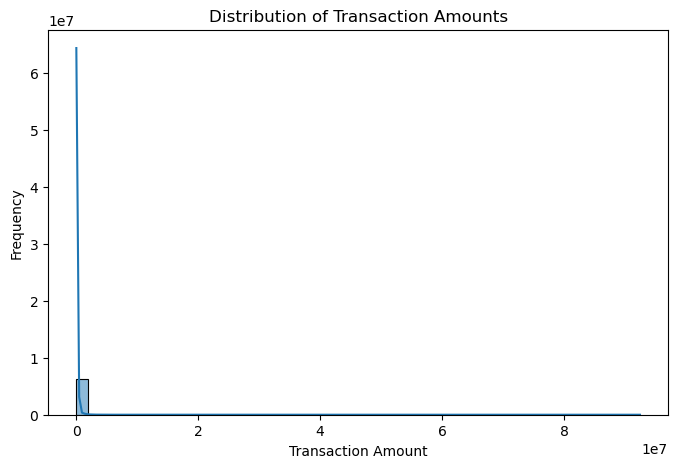

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

### Boxplot (Detecting Outliers in Amount)

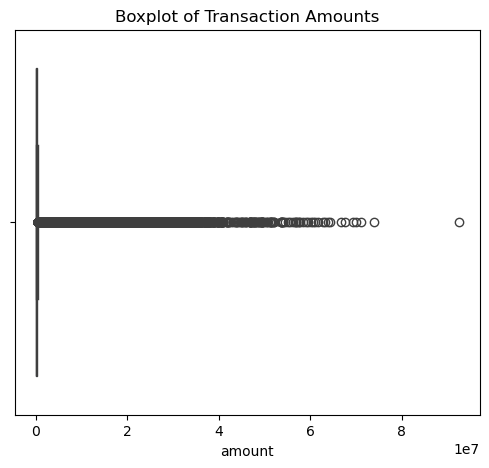

In [7]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df["amount"])
plt.title("Boxplot of Transaction Amounts")
plt.show()

### Countplot of Transaction Types

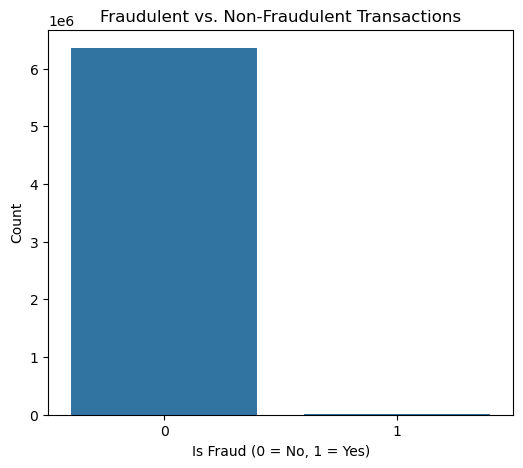

In [8]:
plt.figure(figsize=(6, 5))
sns.countplot(x="isFraud", data=df)
plt.title("Fraudulent vs. Non-Fraudulent Transactions")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## Bivariate Analysis

### Scatter Plot (Amount vs Old Balance)

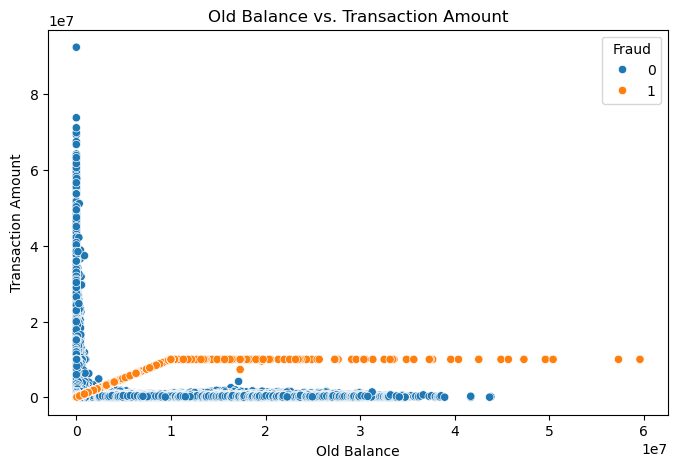

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["oldbalanceOrg"], y=df["amount"], hue=df["isFraud"])
plt.title("Old Balance vs. Transaction Amount")
plt.xlabel("Old Balance")
plt.ylabel("Transaction Amount")
plt.legend(title="Fraud")
plt.show()

### Boxplot (Transaction Amount by Transaction Type)

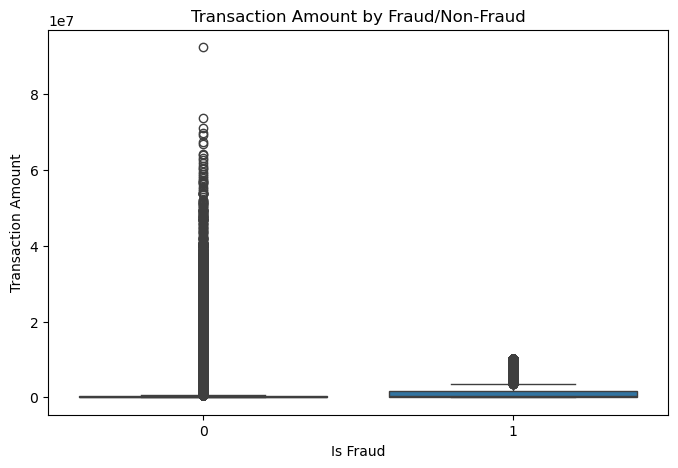

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="isFraud", y="amount", data=df)
plt.title("Transaction Amount by Fraud/Non-Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()

### Heatmap (Correlation Between Features)

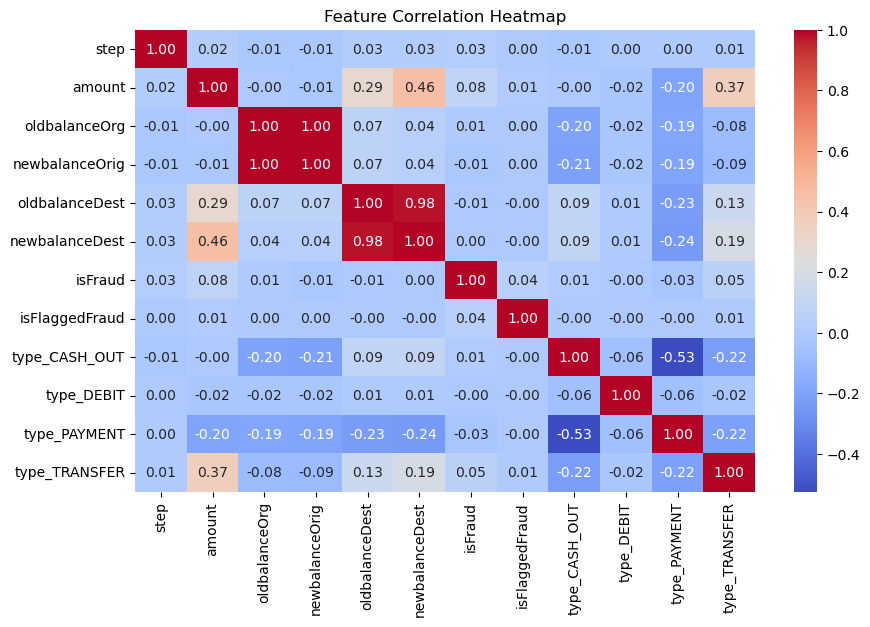

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Multivariate Analysis

### Pairplot for Feature Relationships

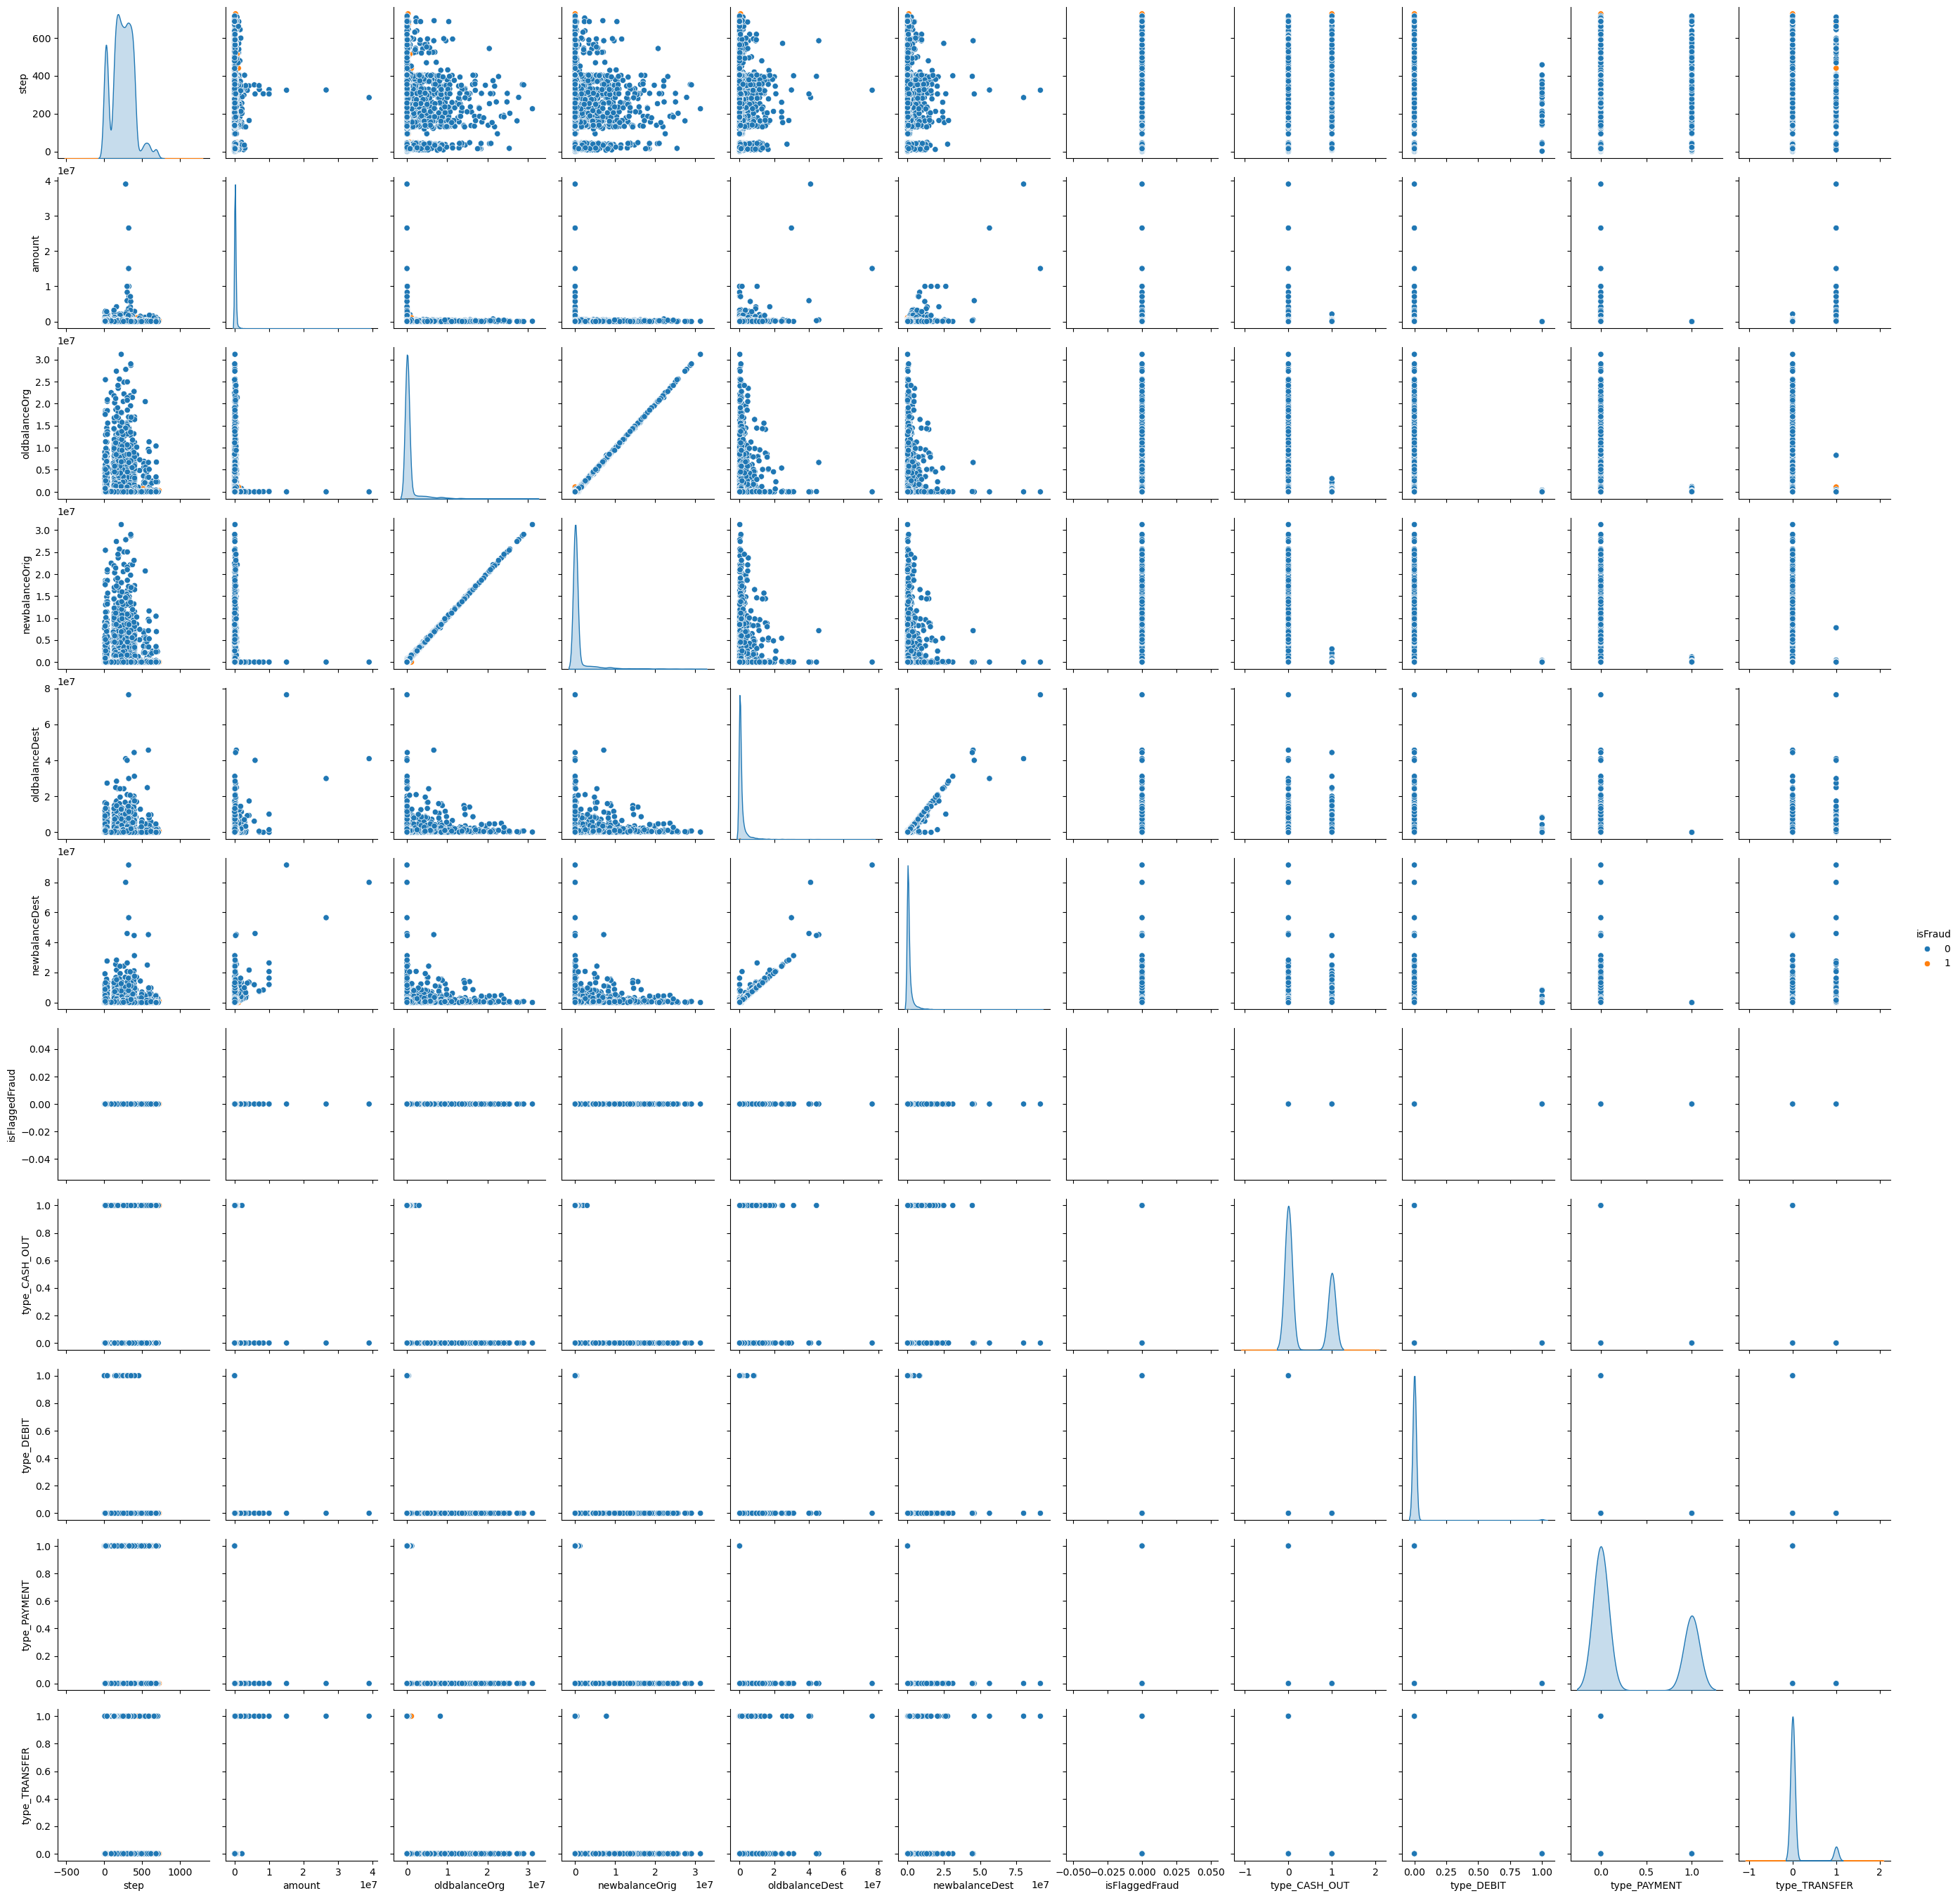

In [12]:
sns.pairplot(df.sample(5000), hue="isFraud", diag_kind="kde")
plt.show()

### 3D Scatter Plot (Amount vs. Old and New Balances)

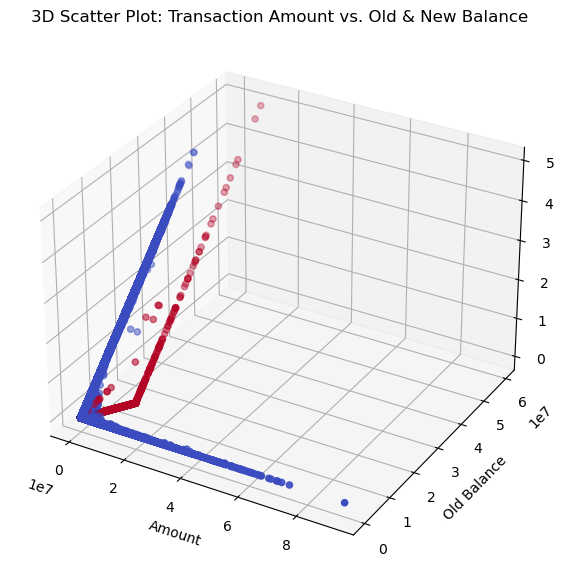

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["amount"], df["oldbalanceOrg"], df["newbalanceOrig"], c=df["isFraud"], cmap="coolwarm")
ax.set_xlabel("Amount")
ax.set_ylabel("Old Balance")
ax.set_zlabel("New Balance")
ax.set_title("3D Scatter Plot: Transaction Amount vs. Old & New Balance")

plt.show()

## Define Features (X) and Target (y)

In [15]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

print(X.shape, y.shape)

(6362620, 11) (6362620,)


## Dataset Splitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

Training Set: (5090096, 11), Test Set: (1272524, 11)


## Scaling of the Data

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train the ML Models

### (a) Logistic Regression

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9992039442871019
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.41      0.57      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.70      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



### (b) Random Forest Classifier

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.999725741911351
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



### (c) K-Nearest Neighbors (KNN)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9995174943655286
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.65      0.77      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.82      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



### (d) Stochastic Gradient Descent (SGD) Classifier

In [20]:
sgd = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

# Calculate accuracy
acc_sgd = accuracy_score(y_test, y_pred_sgd)

# Print performance metrics
print("SGD Classifier Accuracy:", acc_sgd)
print(classification_report(y_test, y_pred_sgd))

SGD Classifier Accuracy: 0.9988353854229861
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.95      0.09      0.16      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.54      0.58   1272524
weighted avg       1.00      1.00      1.00   1272524



### (e) Decision Tree

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", acc_dt)
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9997163118338043
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.88      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



### (f) XGBoost (XGBClassifier)

In [22]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", acc_xgb)
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9997846798960177
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.87      0.91      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.94      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524



### (h) SVM with Linear SVC

In [46]:
svc = LinearSVC(random_state=42, max_iter=5000, dual="auto")  # Suppressing the warning
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

acc_svc = accuracy_score(y_test, y_pred_svc)

print("Linear SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

Linear SVC Accuracy: 0.9992015867677152
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.39      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.69      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



## Visualizing Performance Metrics

### (a) Define Confusion Matrix Function

In [25]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

### (b) Define ROC Curve Function

In [29]:
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

## Visualizing Model Performance

### (a) Logistic Regression


🔹 Logistic Regression 🔹


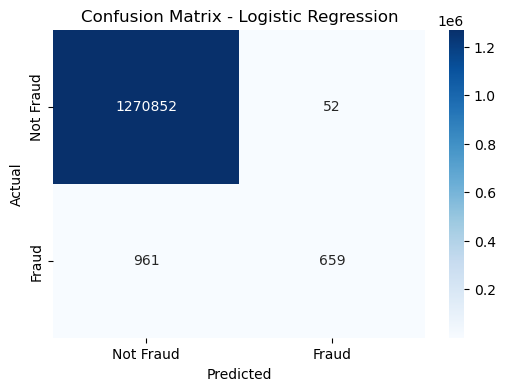

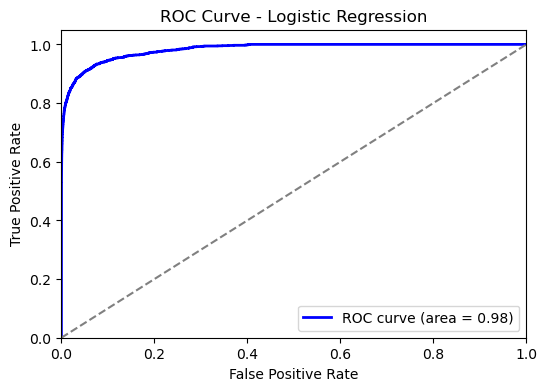

In [30]:
print("\n🔹 Logistic Regression 🔹")
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")

# ROC Curve (if applicable)
if hasattr(log_reg, "predict_proba"):
    y_pred_prob_log = log_reg.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_pred_prob_log, "Logistic Regression")

### (b) Random Forest


🔹 Random Forest 🔹


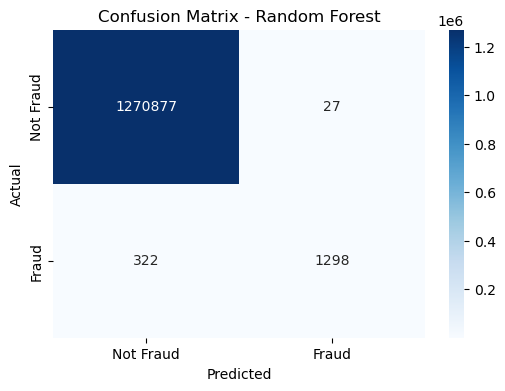

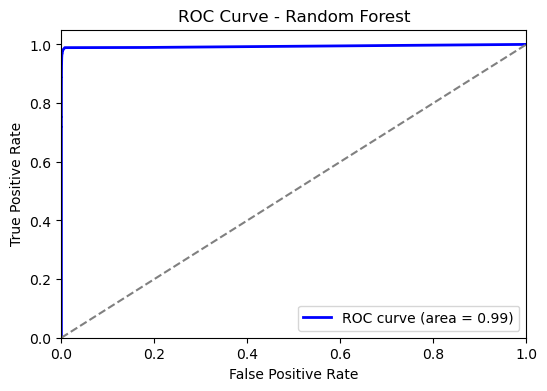

In [31]:
print("\n🔹 Random Forest 🔹")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

if hasattr(rf, "predict_proba"):
    y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_pred_prob_rf, "Random Forest")

### (c) K-Nearest Neighbors


🔹 K-Nearest Neighbors (KNN) 🔹


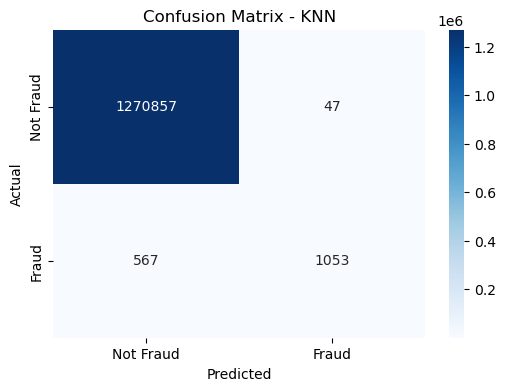

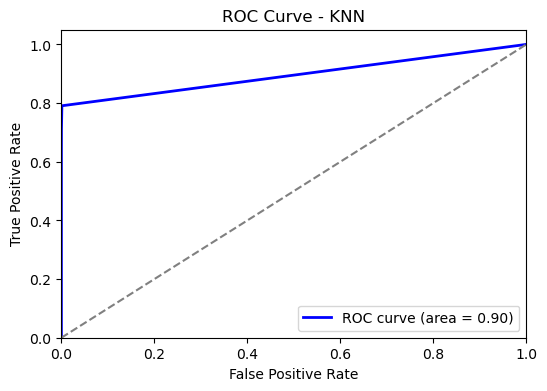

In [32]:
print("\n🔹 K-Nearest Neighbors (KNN) 🔹")
plot_confusion_matrix(y_test, y_pred_knn, "KNN")

if hasattr(knn, "predict_proba"):
    y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_pred_prob_knn, "KNN")

### (d) Stochastic Gradient Descent (SGD)

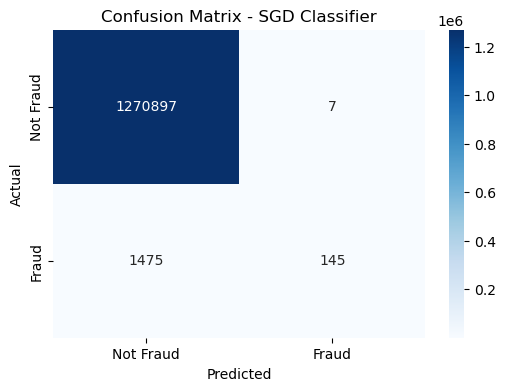

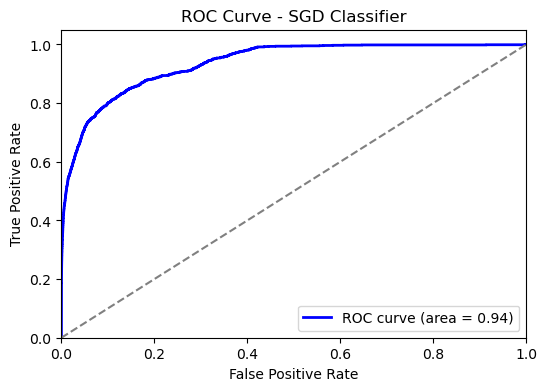

In [33]:
y_pred_prob_sgd = sgd.decision_function(X_test)
plot_confusion_matrix(y_test, y_pred_sgd, "SGD Classifier")
plot_roc_curve(y_test, y_pred_prob_sgd, "SGD Classifier")

### (e) Decision Tree


🔹 Decision Tree 🔹


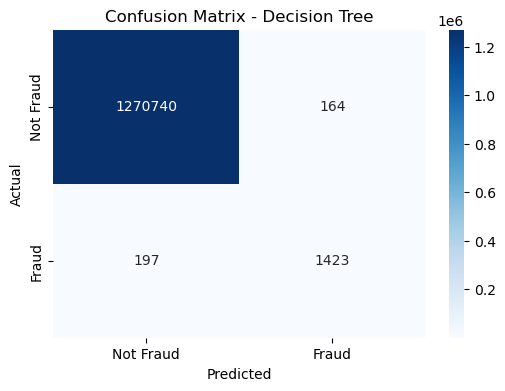

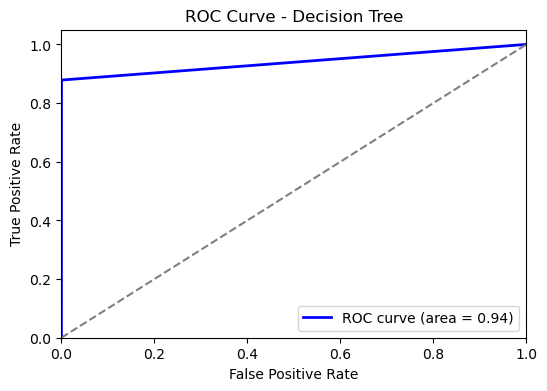

In [34]:
print("\n🔹 Decision Tree 🔹")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

if hasattr(dt, "predict_proba"):
    y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_pred_prob_dt, "Decision Tree")

### (g) XGBoost


🔹 XGBoost 🔹


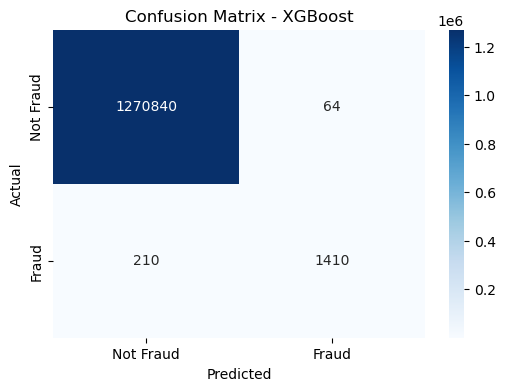

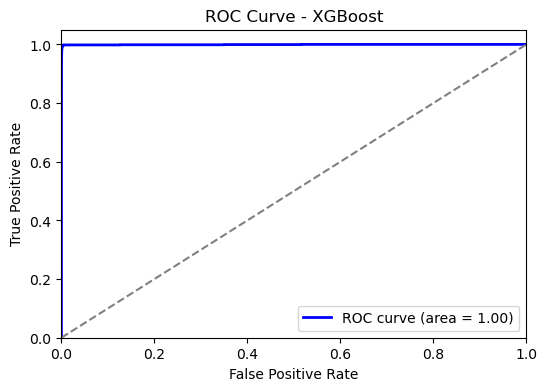

In [35]:
print("\n🔹 XGBoost 🔹")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

if hasattr(xgb, "predict_proba"):
    y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]
    plot_roc_curve(y_test, y_pred_prob_xgb, "XGBoost")

### (h) SVM with Linear SVC


🔹 Linear SVC 🔹


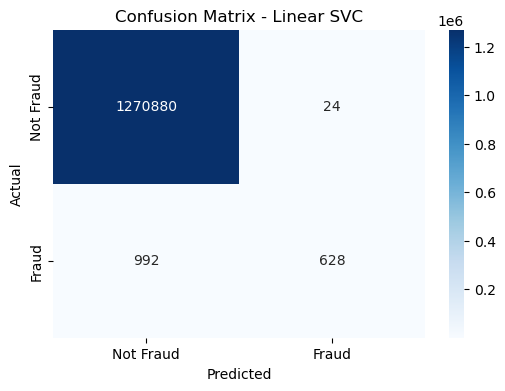

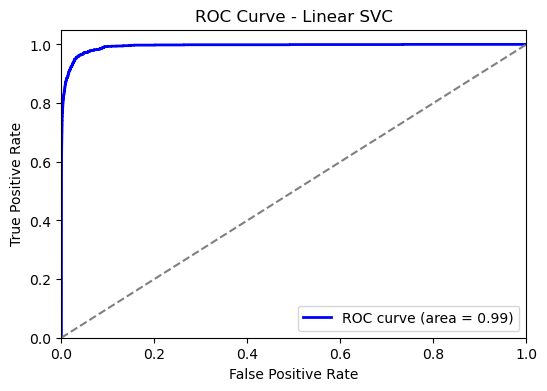

In [47]:
print("\n🔹 Linear SVC 🔹")
plot_confusion_matrix(y_test, y_pred_svc, "Linear SVC")

# Linear SVC does not have predict_proba, use decision function instead
y_pred_prob_svc = svc.decision_function(X_test)
plot_roc_curve(y_test, y_pred_prob_svc, "Linear SVC")

## Model Performance Visualization


🔹 Logistic Regression 🔹


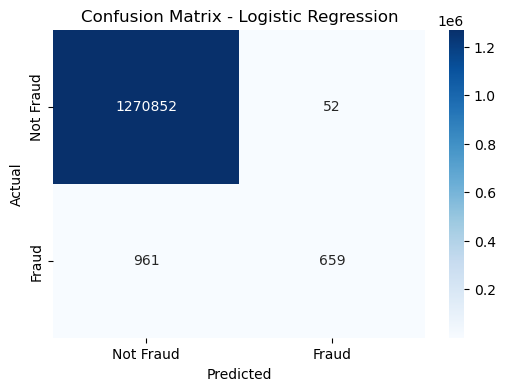

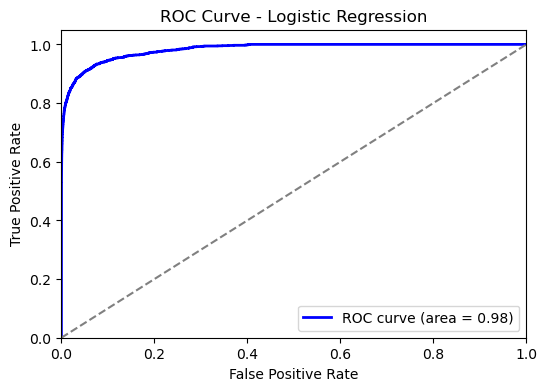


🔹 Random Forest 🔹


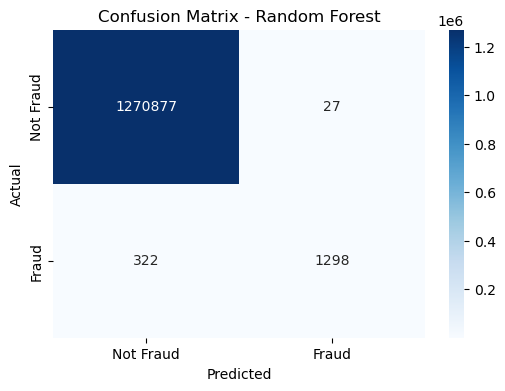

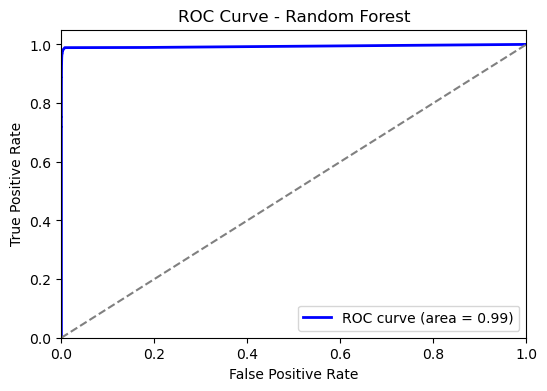


🔹 KNN 🔹


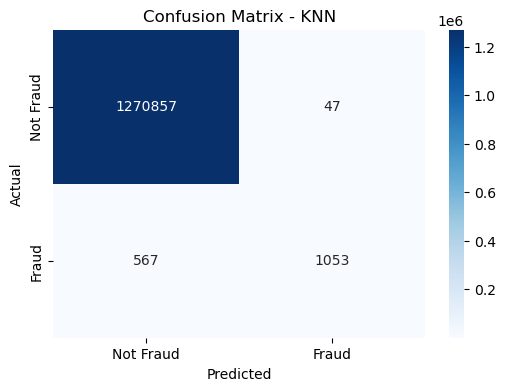

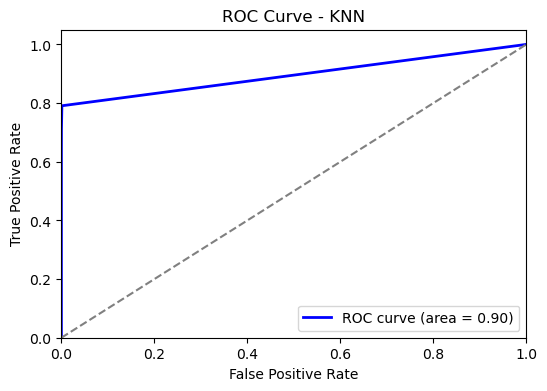


🔹 Decision Tree 🔹


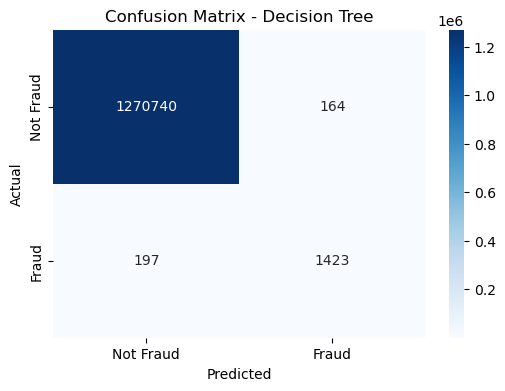

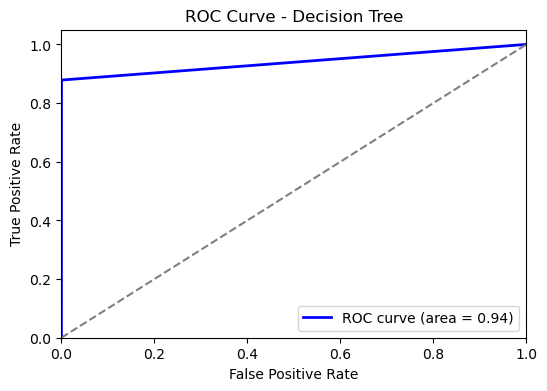


🔹 XGBoost 🔹


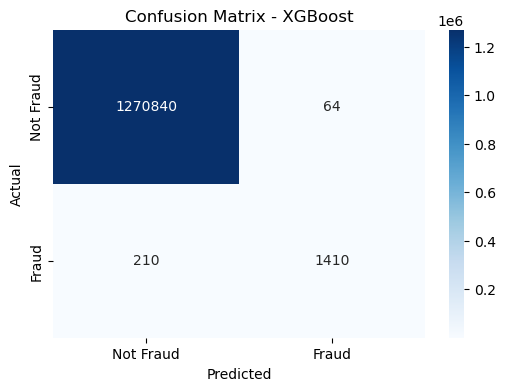

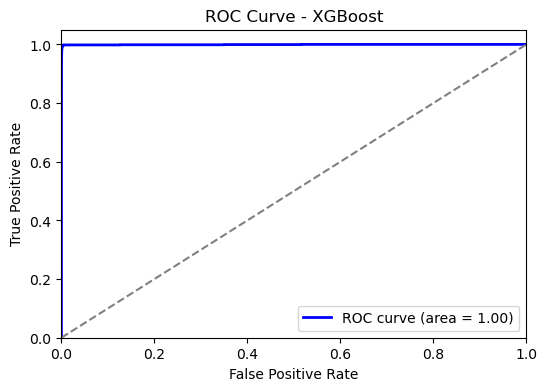


🔹 SGD 🔹


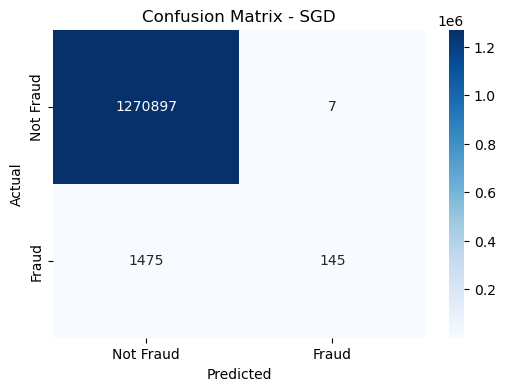

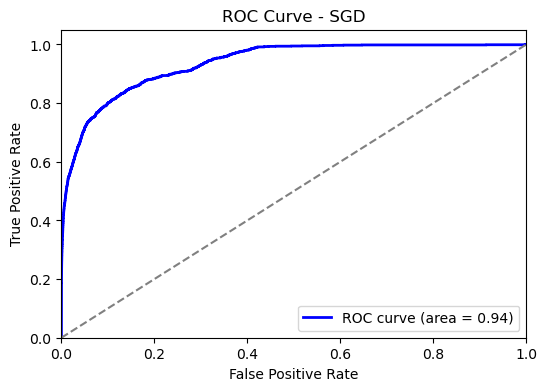


🔹 Linear SVC 🔹


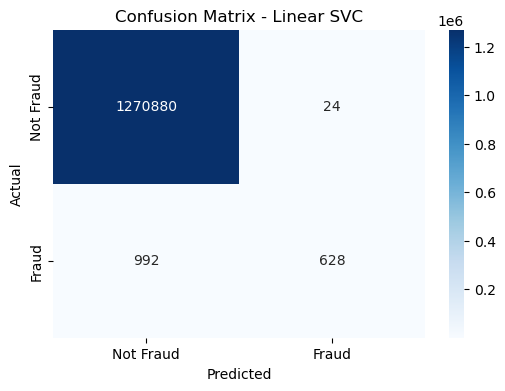

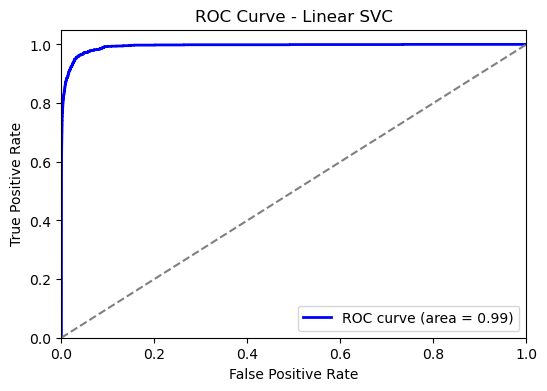

In [48]:
models = {
    "Logistic Regression": (log_reg, y_pred_log),
    "Random Forest": (rf, y_pred_rf),
    "KNN": (knn, y_pred_knn),
    "Decision Tree": (dt, y_pred_dt),
    "XGBoost": (xgb, y_pred_xgb),
    "SGD": (sgd, y_pred_sgd),
    "Linear SVC": (svc, y_pred_svc)
}

for model_name, (model, y_pred) in models.items():
    print(f"\n🔹 {model_name} 🔹")
    plot_confusion_matrix(y_test, y_pred, model_name)

    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):  # For Linear SVC & SGD
        y_pred_prob = model.decision_function(X_test)
    else:
        y_pred_prob = y_pred  # Direct predictions if probability is unavailable

    plot_roc_curve(y_test, y_pred_prob, model_name)

## Compare Model Accuracies

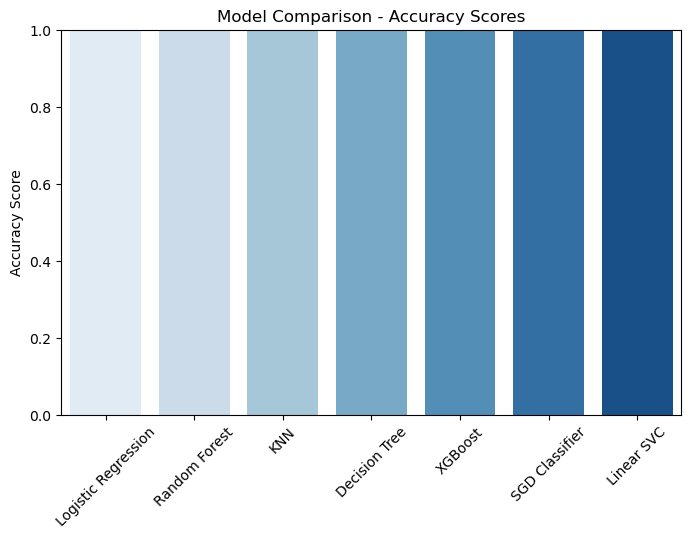

In [49]:
model_accuracies = {
    "Logistic Regression": acc_log,
    "Random Forest": acc_rf,
    "KNN": acc_knn,
    "Decision Tree": acc_dt,
    "XGBoost": acc_xgb,
    "SGD Classifier": acc_sgd,
    "Linear SVC": acc_svc
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), hue=list(model_accuracies.keys()), legend=False, palette="Blues")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison - Accuracy Scores")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

## Determine the Best Model

In [50]:
best_model = max(model_accuracies, key=model_accuracies.get)
print("\nBest Model for Fraud Detection:", best_model, "with accuracy", model_accuracies[best_model])


Best Model for Fraud Detection: XGBoost with accuracy 0.9997846798960177
